<a href="https://colab.research.google.com/github/KentaSUGAI/gemini-gen-dot-image/blob/main/gemini_2_0_flash_exp_gen_chara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://note.com/npaka/n/nc7ae293a3d41 を参考

https://zenn.dev/kun432/scraps/efa6ca69194d18 も次に参照

In [ ]:
!pip install google-genai

In [ ]:
from google.colab import userdata

# 環境変数の準備 (左端の鍵アイコンでGOOGLE_API_KEYを設定)
GOOGLE_API_KEY = userdata.get("GOOGLE_API_KEY")

In [ ]:
from google import genai

# クライアントの準備
client = genai.Client(api_key=GOOGLE_API_KEY)

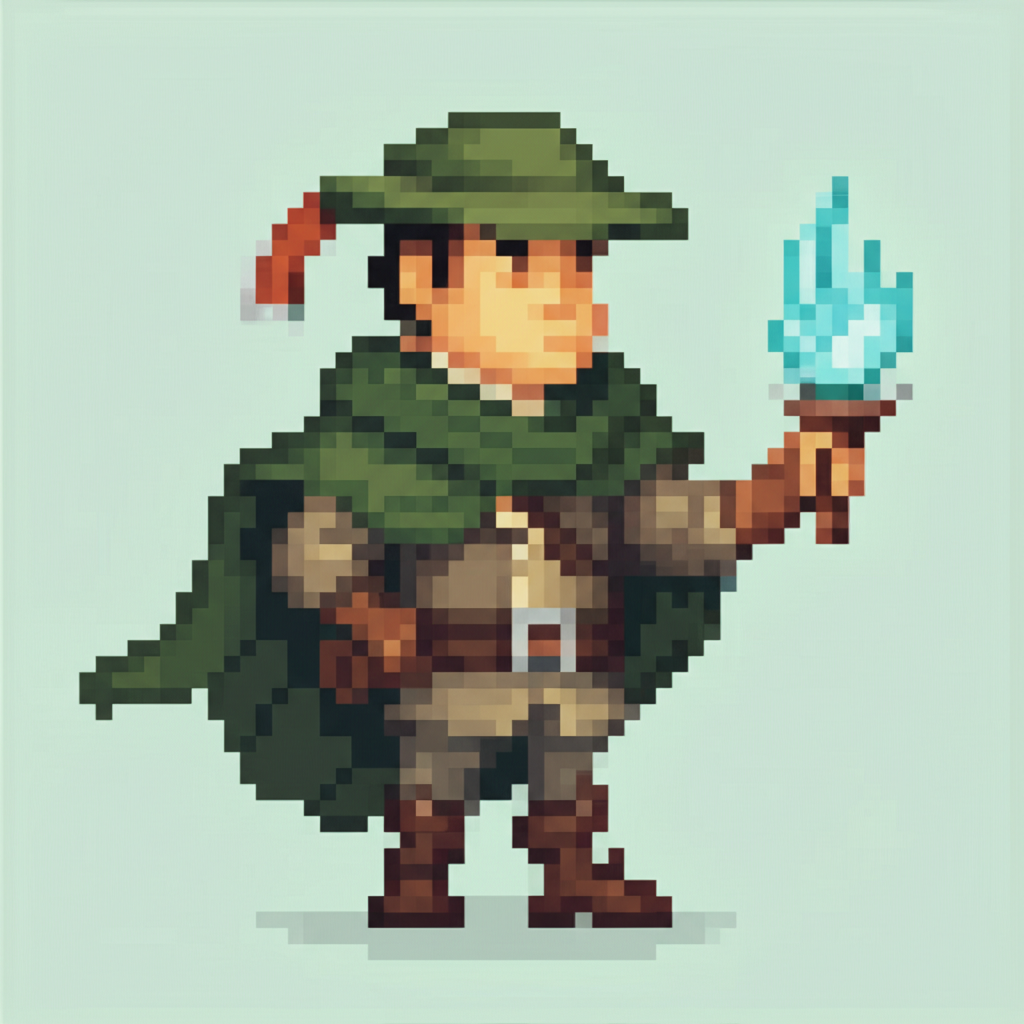

In [ ]:
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO

# 推論の実行
response = client.models.generate_content(
    model="models/gemini-2.0-flash-exp",
    contents=("Generate a pixel art of a businessman dressed as an adventurer."),
    config=types.GenerateContentConfig(response_modalities=['Text', 'Image'])
)

def save_image(data, filename):
    """画像を保存する"""
    image = Image.open(BytesIO(data))
    image.save(filename)

# テキストと画像の表示
for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = Image.open(BytesIO(part.inline_data.data))
    display(image)
    save_image(part.inline_data.data, f"output.png")

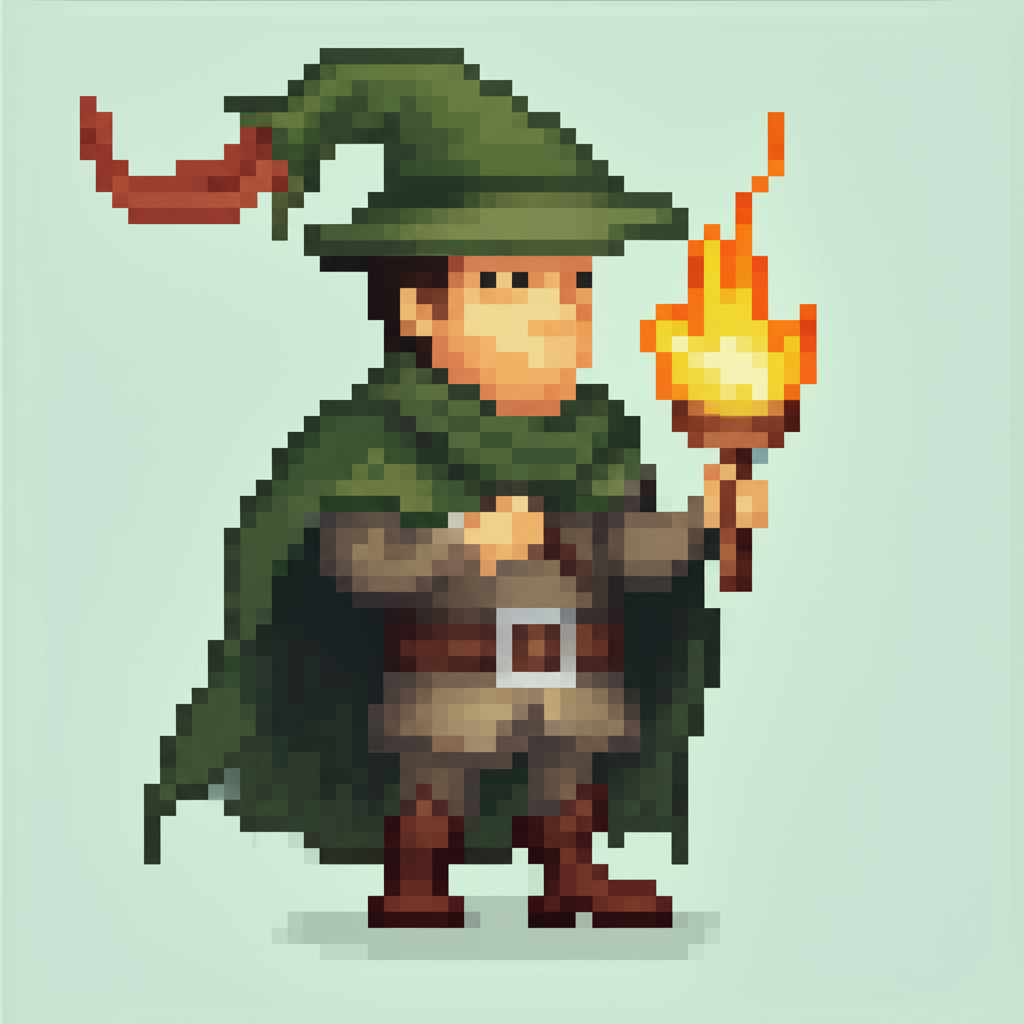

In [ ]:
response = client.models.generate_content(
    model="models/gemini-2.0-flash-exp",
    contents=[
        "Create a variation of this image.",
        Image.open("output.png")
    ],
    config=types.GenerateContentConfig(response_modalities=['Text', 'Image'])
)

for part in response.candidates[0].content.parts:
    if part.inline_data:
        image = Image.open(BytesIO(part.inline_data.data))
        display(image)
        save_image(part.inline_data.data, f"output2.png")
    else:
        print(part.text)

In [ ]:
from PIL import Image, ImageSequence

# 生成した画像を GIF アニメーションとして保存する
def create_gif_from_images(image_files, output_filename, duration=500):
    """
    複数の画像ファイルから GIF アニメーションを作成する

    Parameters:
    image_files (list): 画像ファイルのパスリスト
    output_filename (str): 出力する GIF ファイルの名前
    duration (int): 各フレームの表示時間（ミリ秒）
    """
    images = [Image.open(image) for image in image_files]

    # 最初の画像をベースに GIF を保存
    images[0].save(
        output_filename,
        save_all=True,
        append_images=images[1:],
        optimize=False,
        duration=duration,
        loop=0  # 0 = 無限ループ
    )
    print(f"GIF アニメーションを {output_filename} に保存しました")

# 作成した画像ファイルのリスト
image_files = ["output.png", "output2.png"]

# GIF アニメーションを作成（フレーム間の時間は 500ms = 0.5秒）
create_gif_from_images(image_files, "animation.gif", duration=500)

GIF アニメーションを animation.gif に保存しました
